# Prueba de conflicto by miguel: Guía de Estudio

Esta guía proporciona una estructura completa para el estudio del análisis de comunidades en redes. Cada sección incluirá conceptos teóricos fundamentales y posteriormente se complementará con implementaciones prácticas en código.

## Estructura del Estudio
1. Descripción y Preparación del Dataset
2. Análisis de Estructura de Red
3. Métodos de Detección de Comunidades
4. Visualización de Comunidades
5. Métricas y Evaluación de Comunidades
6. Análisis Temporal de Comunidades

# 1. Descripción y Preparación del Dataset

En esta sección aprenderemos sobre:

## 1.1 Tipos de Redes para Análisis de Comunidades
- Redes sociales
- Redes biológicas
- Redes de información
- Redes tecnológicas

## 1.2 Requisitos de los Datos
- Formato de datos de entrada
- Estructuras de grafos
- Matrices de adyacencia
- Listas de enlaces

## 1.3 Preparación de Datos
- Limpieza de datos
- Normalización
- Manejo de datos faltantes
- Filtrado de conexiones

💡 **Nota**: Aquí se insertará código para:
- Carga de datos
- Conversión de formatos
- Limpieza básica
- Creación de estructura de grafo

In [1]:
# Carga y creación de muestra para edgelist grande
import os
import math
import networkx as nx

DATAFILE = 'wiki-topcats.txt'  # ajustar ruta si procede
SAMPLE_PATH = 'wiki-topcats-sample.txt'

def file_size_mb(path):
    try:
        return os.path.getsize(path) / (1024*1024)
    except Exception:
        return None

def build_sample(path, max_lines=200000, save_sample=False):
    G = nx.Graph()
    if not os.path.exists(path):
        print('Archivo no encontrado:', path)
        return G
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if max_lines and i >= max_lines:
                break
            parts = line.strip().split()
            if len(parts) < 2:
                continue
            u, v = parts[0], parts[1]
            G.add_edge(u, v)
    if save_sample:
        with open(SAMPLE_PATH, 'w', encoding='utf-8') as out:
            for u, v in G.edges():
                out.write(f"{u} {v}\n")
        print('Muestra guardada en', SAMPLE_PATH)
    return G

# Selección automática: si el archivo es muy grande, usar muestra
size = file_size_mb(DATAFILE)
if size is None:
    print('No se encontró', DATAFILE, 'en el directorio actual. Ajusta DATAFILE si es necesario.')
    G = nx.Graph()
else:
    print(f'File size: {size:.1f} MB')
    if size > 150:
        print('Archivo grande detectado. Construyendo muestra de 200k líneas...')
        G = build_sample(DATAFILE, max_lines=200000, save_sample=False)
    else:
        print('Archivo moderado/pequeño. Construyendo grafo completo...')
        G = build_sample(DATAFILE, max_lines=None, save_sample=False)

print('Grafo construido: Nodos=', G.number_of_nodes(), 'Aristas=', G.number_of_edges())

File size: 402.5 MB
Archivo grande detectado. Construyendo muestra de 200k líneas...
Grafo construido: Nodos= 43290 Aristas= 190328
Grafo construido: Nodos= 43290 Aristas= 190328


# 2. Análisis de Estructura de Red

Esta sección cubre las métricas fundamentales para entender la estructura de una red:

## 2.1 Métricas Básicas de Red
- Densidad de la red
- Distribución de grado
- Coeficiente de clustering
- Longitud de camino promedio

## 2.2 Medidas de Centralidad
- Centralidad de grado
- Centralidad de intermediación
- Centralidad de cercanía
- Centralidad de eigenvector

## 2.3 Propiedades Estructurales
- Componentes conectados
- Puentes y puntos de articulación
- Triángulos y coeficientes locales
- Patrones de conectividad

💡 **Nota**: Aquí se insertará código para:
- Cálculo de métricas básicas
- Análisis de centralidad
- Visualización de distribuciones
- Identificación de estructuras clave

Nodos=43290 Aristas=190328
Grado: min 1 max 1145 mean 8.79
Densidad: 0.00020312694664146534
Clustering medio: 0.1225
Número de componentes: 42
Tamaño de la componente gigante: 43168
Clustering medio: 0.1225
Número de componentes: 42
Tamaño de la componente gigante: 43168
Número total de triángulos (sum/3): 277374

Top 10 nodos por centralidad de grado:
4515 0.0265
5909 0.0252
7883 0.0241
5986 0.0194
5984 0.0179
8309 0.0179
6267 0.0175
4500 0.016
7780 0.0154
4513 0.0144
Número total de triángulos (sum/3): 277374

Top 10 nodos por centralidad de grado:
4515 0.0265
5909 0.0252
7883 0.0241
5986 0.0194
5984 0.0179
8309 0.0179
6267 0.0175
4500 0.016
7780 0.0154
4513 0.0144

Top 10 nodos por betweenness (aprox):
279122 0.0702
5909 0.0345
4515 0.0304
5984 0.0273
7883 0.0256
6389 0.0245
8309 0.0227
362517 0.0222
6788 0.0208
5986 0.0188

Top 10 nodos por betweenness (aprox):
279122 0.0702
5909 0.0345
4515 0.0304
5984 0.0273
7883 0.0256
6389 0.0245
8309 0.0227
362517 0.0222
6788 0.0208
5986 0.018

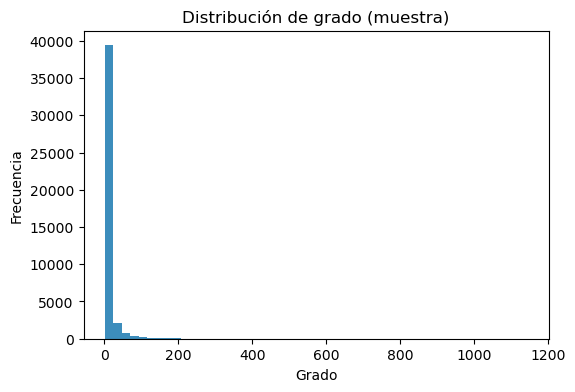

In [2]:
# Métricas básicas y centralidad (muestra)
import statistics
from collections import Counter

if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    n = G.number_of_nodes(); m = G.number_of_edges()
    print(f'Nodos={n} Aristas={m}')

    # Grado
    degrees = [d for _, d in G.degree()]
    print('Grado: min', min(degrees), 'max', max(degrees), 'mean', round(statistics.mean(degrees), 2))

    # Densidad
    print('Densidad:', nx.density(G))

    # Clustering
    try:
        clustering_vals = nx.clustering(G)
        print('Clustering medio:', round(statistics.mean(clustering_vals.values()), 4))
    except Exception:
        print('Error calculando clustering (grafo dirigido o muy grande)')

    # Componentes
    comps = sorted(nx.connected_components(G), key=len, reverse=True)
    print('Número de componentes:', len(comps))
    print('Tamaño de la componente gigante:', len(comps[0]) if comps else 0)

    # Triángulos (local)
    try:
        tri = nx.triangles(G)
        print('Número total de triángulos (sum/3):', sum(tri.values()) // 3)
    except Exception:
        pass

    # Centralidades (rápido: grado; aproximado: betweenness con k)
    deg_cent = nx.degree_centrality(G)
    top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
    print('\nTop 10 nodos por centralidad de grado:')
    for node, val in top_deg:
        print(node, round(val, 4))

    try:
        # k se ajusta para aproximar si el grafo es grande
        k = 200 if n > 5000 else None
        bet = nx.betweenness_centrality(G, k=k)
        top_bet = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:10]
        print('\nTop 10 nodos por betweenness (aprox):')
        for node, val in top_bet:
            print(node, round(val, 4))
    except Exception as e:
        print('Betweenness skipped or failed:', e)

    # Histograma de grado si matplotlib disponible
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(6, 4))
        plt.hist(degrees, bins=50, color='#3c8dbc')
        plt.xlabel('Grado')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de grado (muestra)')
        plt.show()
    except Exception as e:
        print('No se pudo graficar distribución de grado:', e)

# 3. Métodos de Detección de Comunidades

Exploraremos los principales algoritmos para detectar comunidades:

## 3.1 Algoritmos Fundamentales
- Método de Louvain
- Algoritmo de Girvan-Newman
- Propagación de Etiquetas
- Optimización de Modularidad

## 3.2 Características de los Algoritmos
- Complejidad computacional
- Escalabilidad
- Resolución límite
- Ventajas y limitaciones

## 3.3 Selección de Método
- Criterios de selección
- Tamaño de la red
- Tipo de comunidades esperadas
- Recursos computacionales

💡 **Nota**: Aquí se insertará código para:
- Implementación de algoritmos
- Comparación de resultados
- Análisis de rendimiento
- Visualización de comunidades detectadas

In [3]:
# Detección de comunidades: Louvain, Label Propagation y demo Girvan-Newman
from collections import Counter

if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    partition = None
    # Louvain (recomendado)
    try:
        import community as community_louvain
        partition = community_louvain.best_partition(G)
        counts = Counter(partition.values())
        print('Comunidades detectadas (Louvain):', len(counts))
        print('Top 5 comunidades (Louvain):', counts.most_common(5))
    except Exception as e:
        print('python-louvain no disponible o falló:', e)
        partition = None

    # Label Propagation (rápido, sin dependencias externas)
    try:
        from networkx.algorithms.community import label_propagation
        lp_comms = list(label_propagation.label_propagation_communities(G))
        print('Comunidades (Label Propagation) detectadas:', len(lp_comms))
    except Exception as e:
        print('Label Propagation falló:', e)

    # Girvan-Newman demo en subgrafo pequeño (solo ilustrativo)
    try:
        from networkx.algorithms import community as nx_comm
        nodes_small = list(sorted(G.nodes(), key=lambda n: G.degree(n), reverse=True))[:300]
        G_small = G.subgraph(nodes_small).copy()
        comp_gen = nx_comm.girvan_newman(G_small)
        top = tuple(sorted(c) for c in next(comp_gen))
        print('Demo Girvan-Newman (subgrafo 300 nodos): comunidades en primer corte =', len(top))
    except Exception as e:
        print('Girvan-Newman demo falló:', e)

    # leave partition in globals for later cells
    if partition:
        print('Partition dictionary available as `partition` (node -> community)')
    else:
        print('No partition available from Louvain; consider installing python-louvain if deseas esa partición.')

python-louvain no disponible o falló: No module named 'community'
Comunidades (Label Propagation) detectadas: 585
Comunidades (Label Propagation) detectadas: 585
Demo Girvan-Newman (subgrafo 300 nodos): comunidades en primer corte = 3
No partition available from Louvain; consider installing python-louvain if deseas esa partición.
Demo Girvan-Newman (subgrafo 300 nodos): comunidades en primer corte = 3
No partition available from Louvain; consider installing python-louvain if deseas esa partición.


# 4. Visualización de Comunidades

Técnicas efectivas para visualizar y comprender las estructuras comunitarias:

## 4.1 Técnicas de Visualización
- Layouts de fuerza dirigida
- Visualización jerárquica
- Mapas de calor
- Representaciones circulares

## 4.2 Estrategias de Diseño Visual
- Codificación por colores
- Agrupamiento visual
- Escalado de nodos
- Filtrado interactivo

## 4.3 Interpretación Visual
- Patrones estructurales
- Roles de nodos
- Conexiones entre comunidades
- Anomalías y casos especiales

💡 **Nota**: Aquí se insertará código para:
- Creación de visualizaciones
- Personalización de layouts
- Interactividad
- Exportación de gráficos

In [ ]:
# Visualización por comunidad (usa `partition` si está disponible)
import matplotlib.pyplot as plt
import math

if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    # Determinar mapa de comunidades
    if 'partition' in globals() and partition:
        comm_map = partition
    else:
        # fallback: cada componente es su propia 'comunidad'
        comm_map = {n: i for i, comp in enumerate(nx.connected_components(G)) for n in comp}

    # Seleccionar la componente gigante para visualizar
    largest_cc = max(nx.connected_components(G), key=len)
    Gv = G.subgraph(largest_cc).copy()

    # Recalcular comm_map limitado a Gv
    nodes = list(Gv.nodes())
    unique_comms = sorted({comm_map.get(n, 0) for n in nodes})
    cmap = plt.cm.get_cmap('tab20', max(1, len(unique_comms)))
    color_list = [cmap(unique_comms.index(comm_map.get(n, 0))) for n in nodes]

    pos = nx.spring_layout(Gv, seed=42, k=0.1, iterations=50)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(Gv, pos, node_size=20, node_color=color_list)
    nx.draw_networkx_edges(Gv, pos, alpha=0.2, width=0.4)
    plt.title('Componente gigante coloreada por comunidad')
    plt.axis('off')
    plt.show()

    # Mostrar tamaños de comunidades en la componente gigante
    size_by_comm = Counter(comm_map.get(n, 0) for n in nodes)
    print('Comunidades en la componente gigante (top 10):', size_by_comm.most_common(10))

C:\Users\Miguel\AppData\Local\Temp\ipykernel_29360\3677995847.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', max(1, len(unique_comms)))


# 5. Métricas y Evaluación de Comunidades

Métodos para evaluar la calidad de las comunidades detectadas:

## 5.1 Métricas de Calidad
- Modularidad
- Conductancia
- Cobertura
- Rendimiento

## 5.2 Evaluación Interna
- Densidad intra-comunidad
- Dispersión inter-comunidad
- Cohesión
- Separación

## 5.3 Evaluación Externa
- Ground truth comparación
- Índice de Rand ajustado
- Información mutua normalizada
- F-measure

💡 **Nota**: Aquí se insertará código para:
- Cálculo de métricas de calidad
- Comparación de resultados
- Validación de comunidades
- Visualización de métricas

In [ ]:
# Evaluación de comunidades: modularidad, conductancia y métricas externas si hay ground truth
from collections import defaultdict

def conductance(G, community_nodes):
    cut = 0
    volS = 0
    for u in community_nodes:
        volS += G.degree(u)
        for v in G.neighbors(u):
            if v not in community_nodes:
                cut += 1
    vol_rest = sum(dict(G.degree()).values()) - volS
    denom = min(volS, vol_rest) if min(volS, vol_rest) > 0 else 1
    return cut / denom

if 'partition' in globals() and partition:
    try:
        import community as community_louvain
        mod = community_louvain.modularity(partition, G)
        print('Modularidad (Louvain):', round(mod, 4))
    except Exception as e:
        print('No se pudo calcular modularidad (python-louvain):', e)

    # Conductance for top communities
    comms = defaultdict(list)
    for n, c in partition.items():
        comms[c].append(n)
    top = sorted(comms.items(), key=lambda x: len(x[1]), reverse=True)[:3]
    for cid, nodes in top:
        print(f'Conductancia comunidad {cid} (tam={len(nodes)}):', round(conductance(G, set(nodes)), 4))

else:
    print('No hay partición disponible para evaluación. Ejecuta la celda de detección de comunidades.')

# Evaluación externa si hay ground truth en dict `true_labels` (node -> label)
try:
    from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
    if 'true_labels' in globals() and 'partition' in globals() and partition:
        nodes_common = [n for n in G.nodes() if n in true_labels and n in partition]
        y_true = [true_labels[n] for n in nodes_common]
        y_pred = [partition[n] for n in nodes_common]
        print('NMI:', round(normalized_mutual_info_score(y_true, y_pred), 4))
        print('ARI:', round(adjusted_rand_score(y_true, y_pred), 4))
except Exception as e:
    # sklearn puede no estar instalado o no haber ground truth
    pass

# 6. Análisis Temporal de Comunidades

Estudio de la evolución de las comunidades a lo largo del tiempo:

## 6.1 Dinámica de Comunidades
- Nacimiento y muerte
- Fusión y división
- Crecimiento y contracción
- Estabilidad y cambio

## 6.2 Métricas Temporales
- Supervivencia de comunidades
- Tasa de cambio
- Persistencia de membresía
- Evolución estructural

## 6.3 Patrones de Evolución
- Ciclos de vida
- Puntos de transición
- Factores de cambio
- Predicción de evolución

💡 **Nota**: Aquí se insertará código para:
- Análisis de series temporales
- Tracking de comunidades
- Visualización de evolución
- Predicción de cambios

---

## Conclusión
Este notebook servirá como guía completa para el análisis de comunidades en redes. Cada sección se irá complementando con implementaciones prácticas en código, ejemplos y visualizaciones interactivas.

In [ ]:
# Ejemplo simple de slicing temporal (si hay timestamps en columna 3)
from collections import defaultdict

def slice_windows(path, window_size=86400, max_lines=None):
    windows = defaultdict(list)
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if max_lines and i>=max_lines: break
            parts = line.strip().split()
            if len(parts) < 3:
                if len(parts) >= 2:
                    windows[0].append((parts[0], parts[1]))
                continue
            try:
                t = int(parts[2])
            except:
                continue
            win = (t//window_size)*window_size
            windows[win].append((parts[0], parts[1]))
    return windows

print('Si tu edgelist incluye timestamps, usa slice_windows para crear snapshots por ventana.')